In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dataframe_image as dfi
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedKFold
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv ('HSQ/data.csv')

In [3]:
######## first thing to do is to clean up the data :) ########
df.max()
#we can see the maximum age is invalid

Q1                   5.0
Q2                   5.0
Q3                   5.0
Q4                   5.0
Q5                   5.0
Q6                   5.0
Q7                   5.0
Q8                   5.0
Q9                   5.0
Q10                  5.0
Q11                  5.0
Q12                  5.0
Q13                  5.0
Q14                  5.0
Q15                  5.0
Q16                  5.0
Q17                  5.0
Q18                  5.0
Q19                  5.0
Q20                  5.0
Q21                  5.0
Q22                  5.0
Q23                  5.0
Q24                  5.0
Q25                  5.0
Q26                  5.0
Q27                  5.0
Q28                  5.0
Q29                  5.0
Q30                  5.0
Q31                  5.0
Q32                  5.0
affiliative          5.1
selfenhancing        5.0
agressive            5.0
selfdefeating        5.0
age              44849.0
gender               3.0
accuracy           100.0
dtype: float64

In [4]:
#change the wrong spelling of a column name according to the paper.
df.rename({'agressive': 'aggressive'}, axis=1, inplace=True)

In [5]:
#checking whether there is invalid data in 'age'
df.nlargest(10, ['age'])

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,aggressive,selfdefeating,age,gender,accuracy
957,1,5,2,1,3,4,4,5,3,4,...,5,5,1,4.3,3.9,2.4,2.1,44849,0,100
632,2,4,4,2,4,5,4,2,2,4,...,5,4,2,4.0,4.0,3.4,2.3,2670,2,70
293,1,3,4,2,3,5,3,3,2,3,...,5,1,3,4.4,3.8,2.5,2.8,242,1,100
303,2,5,4,3,4,5,3,4,2,4,...,5,1,4,4.5,4.1,3.4,3.9,151,1,91
23,3,4,1,5,4,4,3,4,2,4,...,5,4,3,3.8,3.8,2.6,3.8,70,2,80
704,1,3,5,2,4,5,3,2,2,3,...,2,1,4,4.6,2.8,3.3,3.0,70,1,95
33,1,5,4,4,4,5,3,4,2,5,...,5,1,4,4.6,4.6,3.3,4.0,69,1,98
501,2,3,2,2,4,5,2,3,1,3,...,-1,-1,3,4.4,2.3,1.1,1.8,69,2,95
172,4,4,2,4,3,4,4,4,2,4,...,4,4,4,3.9,3.8,3.1,3.4,68,2,90
344,2,3,3,2,4,3,4,4,4,4,...,2,4,2,3.3,3.4,3.0,2.8,67,1,80


In [6]:
## deleting the columns that has invalid ages. According to 'https://grg.org/Adams/B.HTM', the oldest human on earth is less than 130 years old, so delete the data of the participant who is 151 years old.
df.drop([957,632,293,303],0,inplace=True) 
df.reset_index(drop=True,inplace=True)

In [7]:
df.min()

Q1               -1.0
Q2               -1.0
Q3               -1.0
Q4               -1.0
Q5               -1.0
Q6               -1.0
Q7               -1.0
Q8               -1.0
Q9               -1.0
Q10              -1.0
Q11              -1.0
Q12              -1.0
Q13              -1.0
Q14              -1.0
Q15              -1.0
Q16              -1.0
Q17              -1.0
Q18              -1.0
Q19              -1.0
Q20              -1.0
Q21              -1.0
Q22              -1.0
Q23              -1.0
Q24              -1.0
Q25              -1.0
Q26              -1.0
Q27              -1.0
Q28              -1.0
Q29              -1.0
Q30              -1.0
Q31              -1.0
Q32              -1.0
affiliative       1.3
selfenhancing     0.0
aggressive        0.0
selfdefeating     0.0
age              14.0
gender            0.0
accuracy          2.0
dtype: float64

In [8]:
#checking whether there is invalid gender
df.nsmallest(10, ['gender'])

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,aggressive,selfdefeating,age,gender,accuracy
153,2,4,4,3,5,5,3,2,3,4,...,5,2,4,4.4,4.5,2.9,2.9,39,0,95
623,1,5,4,1,1,5,4,1,1,5,...,5,2,2,4.5,4.6,3.1,1.5,27,0,90
836,1,5,5,4,5,5,3,2,1,4,...,5,1,5,5.0,3.9,3.1,3.4,15,0,100
839,1,4,5,3,5,5,2,2,1,4,...,5,1,4,5.0,4.1,3.0,3.1,15,0,100
2,3,4,3,3,4,4,3,1,2,4,...,5,4,2,3.9,3.9,3.1,2.3,50,1,75
4,1,4,2,2,3,5,4,1,4,4,...,5,4,2,4.1,4.1,2.9,2.0,52,1,80
6,4,1,2,4,2,3,3,3,4,4,...,3,4,4,2.3,2.3,2.8,2.8,27,1,60
7,2,4,4,1,5,5,4,3,2,4,...,5,2,2,4.4,4.1,3.3,2.5,34,1,88
9,4,2,4,1,3,5,4,2,3,1,...,5,3,2,2.4,2.9,3.8,2.3,18,1,85
10,1,5,1,3,4,5,4,3,2,5,...,5,2,3,4.5,4.5,3.4,2.6,33,1,86


In [9]:
#deleting colomns of invalid gender input
df.drop([153,623,836,839],0,inplace = True)
df.reset_index(drop=True,inplace=True)

In [10]:
df.nlargest(10, ['gender'])

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,aggressive,selfdefeating,age,gender,accuracy
137,1,4,2,5,1,5,4,3,3,4,...,5,3,2,3.3,4.3,3.1,3.5,38,3,90
199,2,3,1,3,4,4,1,4,2,3,...,5,2,2,4.5,3.4,2.4,3.1,27,3,72
216,4,5,3,3,4,5,2,4,5,3,...,4,1,2,3.0,3.8,2.6,3.5,20,3,90
471,4,1,2,1,3,5,3,1,4,1,...,4,5,1,2.5,2.3,3.0,1.6,30,3,100
555,1,3,1,1,4,5,3,2,4,4,...,5,3,1,4.3,3.5,3.0,2.4,24,3,95
748,2,4,1,2,1,4,1,1,5,1,...,4,5,1,3.5,3.0,3.6,2.0,24,3,90
821,2,4,3,3,3,4,2,1,1,5,...,5,2,4,4.5,4.0,2.5,2.1,21,3,80
838,3,2,3,3,2,4,2,3,4,2,...,5,3,2,2.6,3.3,2.9,2.6,19,3,80
0,2,2,3,1,4,5,4,3,4,3,...,4,2,2,4.0,3.5,3.0,2.3,25,2,100
1,2,3,2,2,4,4,4,3,4,3,...,4,3,1,3.3,3.5,3.3,2.4,44,2,90


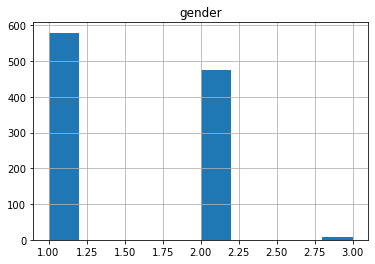

In [11]:
fig, ax = plt.subplots()
df.hist('gender',ax=ax)
fig.savefig('age1.png')

In [12]:
#we focus on the data between male and female because the amount of other genders is too small compared to male and female
df.drop([137,199,216,471,555,748,821,838],0,inplace = True)
df.reset_index(drop=True,inplace=True)

In [13]:
df.min()

Q1               -1.0
Q2               -1.0
Q3               -1.0
Q4               -1.0
Q5               -1.0
Q6               -1.0
Q7               -1.0
Q8               -1.0
Q9               -1.0
Q10              -1.0
Q11              -1.0
Q12              -1.0
Q13              -1.0
Q14              -1.0
Q15              -1.0
Q16              -1.0
Q17              -1.0
Q18              -1.0
Q19              -1.0
Q20              -1.0
Q21              -1.0
Q22              -1.0
Q23              -1.0
Q24              -1.0
Q25              -1.0
Q26              -1.0
Q27              -1.0
Q28              -1.0
Q29              -1.0
Q30              -1.0
Q31              -1.0
Q32              -1.0
affiliative       1.3
selfenhancing     0.0
aggressive        0.0
selfdefeating     0.0
age              14.0
gender            1.0
accuracy          2.0
dtype: float64

In [14]:
#replace every '-1' value in the questionaire to NaN
df.replace({ -1: np.nan}, inplace=True)

In [15]:
dff = df.copy()
# checking how many non-filled questions in the questionaire each participant
dff['empty']=(df.isnull() == True).T.sum()
#pick out rows(participants) that failed to answer more than 1/3 of the question
df_empty = dff[dff['empty'] > 32/3]
df_empty.drop(['affiliative','selfenhancing','aggressive','aggressive','selfdefeating','gender','age','accuracy'], axis=1, inplace=True)
df_empty

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,empty
494,2.0,3.0,2.0,2.0,4.0,5.0,2.0,3.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,13
705,1.0,3.0,2.0,3.0,4.0,3.0,4.0,2.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
802,1.0,3.0,4.0,3.0,4.0,5.0,5.0,2.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32


In [16]:
df_empty.drop(['Q'+str(i) for i in range(2,31)], axis=1, inplace=True)
df_empty.rename(columns={'Q31': '...'}, inplace=True)
df_empty['...'].fillna('...', inplace=True)

df_empty
dfi.export(df_empty, 'df_empty.png')

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [17]:
#deleting all participants who left more than 1/3 of the questions.
df.drop([1009,705,802,494],0,inplace = True)
df.reset_index(drop=True,inplace=True)
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,aggressive,selfdefeating,age,gender,accuracy
0,2.0,2.0,3.0,1.0,4.0,5.0,4.0,3.0,4.0,3.0,...,4.0,2.0,2.0,4.0,3.5,3.0,2.3,25.0,2.0,100.0
1,2.0,3.0,2.0,2.0,4.0,4.0,4.0,3.0,4.0,3.0,...,4.0,3.0,1.0,3.3,3.5,3.3,2.4,44.0,2.0,90.0
2,3.0,4.0,3.0,3.0,4.0,4.0,3.0,1.0,2.0,4.0,...,5.0,4.0,2.0,3.9,3.9,3.1,2.3,50.0,1.0,75.0
3,3.0,3.0,3.0,4.0,3.0,5.0,4.0,3.0,NaN,4.0,...,5.0,3.0,3.0,3.6,4.0,2.9,3.3,30.0,2.0,85.0
4,1.0,4.0,2.0,2.0,3.0,5.0,4.0,1.0,4.0,4.0,...,5.0,4.0,2.0,4.1,4.1,2.9,2.0,52.0,1.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,3.0,2.0,3.0,3.0,2.0,5.0,3.0,2.0,3.0,4.0,...,4.0,4.0,4.0,2.5,3.3,2.9,3.0,18.0,2.0,95.0
1047,1.0,4.0,5.0,2.0,4.0,4.0,1.0,2.0,2.0,5.0,...,4.0,1.0,2.0,4.8,3.9,2.5,2.4,31.0,1.0,95.0
1048,1.0,4.0,4.0,5.0,4.0,4.0,3.0,5.0,4.0,3.0,...,4.0,1.0,5.0,4.4,3.9,3.0,4.3,15.0,1.0,95.0
1049,3.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,4.0,3.0,...,4.0,3.0,3.0,3.1,3.6,2.9,2.8,21.0,2.0,87.0


In [18]:
#replace the NaN value with the mean value of the each question(colomn)
question = df.loc[: , "Q1":"Q32"]
df.loc[:, "Q1":"Q32"] = df.loc[:,"Q1":"Q32"].fillna(value=question.mean())

In [19]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,aggressive,selfdefeating,age,gender,accuracy
0,2.0,2.0,3.0,1.0,4.0,5.0,4.0,3.0,4.00000,3.0,...,4.0,2.0,2.0,4.0,3.5,3.0,2.3,25.0,2.0,100.0
1,2.0,3.0,2.0,2.0,4.0,4.0,4.0,3.0,4.00000,3.0,...,4.0,3.0,1.0,3.3,3.5,3.3,2.4,44.0,2.0,90.0
2,3.0,4.0,3.0,3.0,4.0,4.0,3.0,1.0,2.00000,4.0,...,5.0,4.0,2.0,3.9,3.9,3.1,2.3,50.0,1.0,75.0
3,3.0,3.0,3.0,4.0,3.0,5.0,4.0,3.0,2.59542,4.0,...,5.0,3.0,3.0,3.6,4.0,2.9,3.3,30.0,2.0,85.0
4,1.0,4.0,2.0,2.0,3.0,5.0,4.0,1.0,4.00000,4.0,...,5.0,4.0,2.0,4.1,4.1,2.9,2.0,52.0,1.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,3.0,2.0,3.0,3.0,2.0,5.0,3.0,2.0,3.00000,4.0,...,4.0,4.0,4.0,2.5,3.3,2.9,3.0,18.0,2.0,95.0
1047,1.0,4.0,5.0,2.0,4.0,4.0,1.0,2.0,2.00000,5.0,...,4.0,1.0,2.0,4.8,3.9,2.5,2.4,31.0,1.0,95.0
1048,1.0,4.0,4.0,5.0,4.0,4.0,3.0,5.0,4.00000,3.0,...,4.0,1.0,5.0,4.4,3.9,3.0,4.3,15.0,1.0,95.0
1049,3.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,4.00000,3.0,...,4.0,3.0,3.0,3.1,3.6,2.9,2.8,21.0,2.0,87.0


In [20]:
#dealing with reversed data according to the paper
df["Q22"] = 6 - df["Q22"]
df["Q7"] = 6 - df["Q7"]
df["Q15"] = 6 - df["Q15"]
df["Q23"] = 6 - df["Q23"]
df["Q31"] = 6 - df["Q31"]
df["Q16"] = 6 - df["Q16"]

In [21]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,aggressive,selfdefeating,age,gender,accuracy
0,2.0,2.0,3.0,1.0,4.0,5.0,2.0,3.0,4.00000,3.0,...,4.0,4.0,2.0,4.0,3.5,3.0,2.3,25.0,2.0,100.0
1,2.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,4.00000,3.0,...,4.0,3.0,1.0,3.3,3.5,3.3,2.4,44.0,2.0,90.0
2,3.0,4.0,3.0,3.0,4.0,4.0,3.0,1.0,2.00000,4.0,...,5.0,2.0,2.0,3.9,3.9,3.1,2.3,50.0,1.0,75.0
3,3.0,3.0,3.0,4.0,3.0,5.0,2.0,3.0,2.59542,4.0,...,5.0,3.0,3.0,3.6,4.0,2.9,3.3,30.0,2.0,85.0
4,1.0,4.0,2.0,2.0,3.0,5.0,2.0,1.0,4.00000,4.0,...,5.0,2.0,2.0,4.1,4.1,2.9,2.0,52.0,1.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,3.0,2.0,3.0,3.0,2.0,5.0,3.0,2.0,3.00000,4.0,...,4.0,2.0,4.0,2.5,3.3,2.9,3.0,18.0,2.0,95.0
1047,1.0,4.0,5.0,2.0,4.0,4.0,5.0,2.0,2.00000,5.0,...,4.0,5.0,2.0,4.8,3.9,2.5,2.4,31.0,1.0,95.0
1048,1.0,4.0,4.0,5.0,4.0,4.0,3.0,5.0,4.00000,3.0,...,4.0,5.0,5.0,4.4,3.9,3.0,4.3,15.0,1.0,95.0
1049,3.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,4.00000,3.0,...,4.0,3.0,3.0,3.1,3.6,2.9,2.8,21.0,2.0,87.0


In [22]:
df['affiliative'] = df[['Q1','Q5','Q9','Q13','Q17','Q21','Q25','Q29']].mean(axis=1)
df['selfenhancing'] = df[['Q2','Q6','Q10','Q14','Q18','Q22','Q26','Q30']].mean(axis=1)
df['aggressive'] = df[['Q3','Q7','Q11','Q15','Q19','Q23','Q27','Q31']].mean(axis=1)
df['selfdefeating'] = df[['Q4','Q8','Q12','Q16','Q20','Q24','Q28','Q32']].mean(axis=1)

In [23]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,aggressive,selfdefeating,age,gender,accuracy
0,2.0,2.0,3.0,1.0,4.0,5.0,2.0,3.0,4.00000,3.0,...,4.0,4.0,2.0,3.000000,3.250,2.750,2.000,25.0,2.0,100.0
1,2.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,4.00000,3.0,...,4.0,3.0,1.0,3.000000,3.500,2.250,2.125,44.0,2.0,90.0
2,3.0,4.0,3.0,3.0,4.0,4.0,3.0,1.0,2.00000,4.0,...,5.0,2.0,2.0,2.875000,4.125,2.625,2.250,50.0,1.0,75.0
3,3.0,3.0,3.0,4.0,3.0,5.0,2.0,3.0,2.59542,4.0,...,5.0,3.0,3.0,3.199427,4.000,2.625,3.250,30.0,2.0,85.0
4,1.0,4.0,2.0,2.0,3.0,5.0,2.0,1.0,4.00000,4.0,...,5.0,2.0,2.0,2.875000,4.125,2.125,1.750,52.0,1.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,3.0,2.0,3.0,3.0,2.0,5.0,3.0,2.0,3.00000,4.0,...,4.0,2.0,4.0,3.250000,3.000,2.375,2.750,18.0,2.0,95.0
1047,1.0,4.0,5.0,2.0,4.0,4.0,5.0,2.0,2.00000,5.0,...,4.0,5.0,2.0,2.500000,3.875,4.500,2.625,31.0,1.0,95.0
1048,1.0,4.0,4.0,5.0,4.0,4.0,3.0,5.0,4.00000,3.0,...,4.0,5.0,5.0,2.875000,3.625,4.000,4.750,15.0,1.0,95.0
1049,3.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,4.00000,3.0,...,4.0,3.0,3.0,3.125000,3.625,3.125,2.500,21.0,2.0,87.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9eae8336d0>]],
      dtype=object)

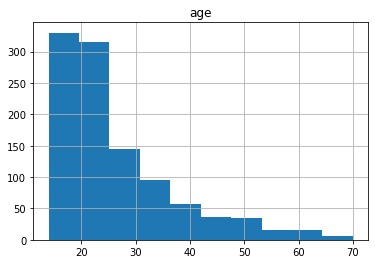

In [24]:
#checking the distribution of age and gender, we can see that the ages doesn't distribute evenly.
df.hist(['age'])


In [25]:
df['age'].describe()

count    1051.000000
mean       26.267364
std        11.010639
min        14.000000
25%        18.000000
50%        22.000000
75%        30.000000
max        70.000000
Name: age, dtype: float64

In [26]:
##change age to 4 consistent age-groups, and four of them have relatively similar distribution.
#Because we only want to see whether older people have more tendency to use self-enhancing humour,
df['age_range'] = pd.qcut(df['age'], q=4)

In [27]:
df['age_range'].value_counts()

(13.999, 18.0]    266
(18.0, 22.0]      264
(30.0, 70.0]      262
(22.0, 30.0]      259
Name: age_range, dtype: int64

In [28]:
# age_group 1 is from 14 - 18, representing teenagers before uni
# age_group 2 is from 18 - 22, uni students
# age_group 3 is form 22 - 30, representing young adults
# age_group 4 is form 30 - 70, representing mid-age adults
# we set the age-group from 0-3 so that the number can also represent which group is older.
age_label = [0, 1, 2, 3]
df['age_group'] = pd.qcut(df['age'], q=[0, .25, .5, .75, 1], labels=age_label)
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q32,affiliative,selfenhancing,aggressive,selfdefeating,age,gender,accuracy,age_range,age_group
0,2.0,2.0,3.0,1.0,4.0,5.0,2.0,3.0,4.00000,3.0,...,2.0,3.000000,3.250,2.750,2.000,25.0,2.0,100.0,"(22.0, 30.0]",2
1,2.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,4.00000,3.0,...,1.0,3.000000,3.500,2.250,2.125,44.0,2.0,90.0,"(30.0, 70.0]",3
2,3.0,4.0,3.0,3.0,4.0,4.0,3.0,1.0,2.00000,4.0,...,2.0,2.875000,4.125,2.625,2.250,50.0,1.0,75.0,"(30.0, 70.0]",3
3,3.0,3.0,3.0,4.0,3.0,5.0,2.0,3.0,2.59542,4.0,...,3.0,3.199427,4.000,2.625,3.250,30.0,2.0,85.0,"(22.0, 30.0]",2
4,1.0,4.0,2.0,2.0,3.0,5.0,2.0,1.0,4.00000,4.0,...,2.0,2.875000,4.125,2.125,1.750,52.0,1.0,80.0,"(30.0, 70.0]",3


In [29]:
df['age_group'].value_counts()

0    266
1    264
3    262
2    259
Name: age_group, dtype: int64

In [30]:
#one hot encode gender so that when using regression, the machine won't consider that male is bigger than female in number 
df = pd.concat([df, pd.get_dummies(df['gender'], prefix="Gender")], axis=1)
df.drop(['gender'],axis = 1,inplace = True)
df.rename(columns={'Gender_1.0':'isMale','Gender_2.0':'isFemale'}, inplace=True)

In [31]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,affiliative,selfenhancing,aggressive,selfdefeating,age,accuracy,age_range,age_group,isMale,isFemale
0,2.0,2.0,3.0,1.0,4.0,5.0,2.0,3.0,4.00000,3.0,...,3.000000,3.250,2.750,2.000,25.0,100.0,"(22.0, 30.0]",2,0,1
1,2.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,4.00000,3.0,...,3.000000,3.500,2.250,2.125,44.0,90.0,"(30.0, 70.0]",3,0,1
2,3.0,4.0,3.0,3.0,4.0,4.0,3.0,1.0,2.00000,4.0,...,2.875000,4.125,2.625,2.250,50.0,75.0,"(30.0, 70.0]",3,1,0
3,3.0,3.0,3.0,4.0,3.0,5.0,2.0,3.0,2.59542,4.0,...,3.199427,4.000,2.625,3.250,30.0,85.0,"(22.0, 30.0]",2,0,1
4,1.0,4.0,2.0,2.0,3.0,5.0,2.0,1.0,4.00000,4.0,...,2.875000,4.125,2.125,1.750,52.0,80.0,"(30.0, 70.0]",3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,3.0,2.0,3.0,3.0,2.0,5.0,3.0,2.0,3.00000,4.0,...,3.250000,3.000,2.375,2.750,18.0,95.0,"(13.999, 18.0]",0,0,1
1047,1.0,4.0,5.0,2.0,4.0,4.0,5.0,2.0,2.00000,5.0,...,2.500000,3.875,4.500,2.625,31.0,95.0,"(30.0, 70.0]",3,1,0
1048,1.0,4.0,4.0,5.0,4.0,4.0,3.0,5.0,4.00000,3.0,...,2.875000,3.625,4.000,4.750,15.0,95.0,"(13.999, 18.0]",0,1,0
1049,3.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,4.00000,3.0,...,3.125000,3.625,3.125,2.500,21.0,87.0,"(18.0, 22.0]",1,0,1


In [32]:
df.drop(df.loc[:,"Q1":"Q32"], axis = 1, inplace = True)
df.drop(['age','accuracy','affiliative','age_range'],axis=1, inplace=True)
df

,selfenhancing,aggressive,selfdefeating,age_group,isMale,isFemale
0,3.250,2.750,2.000,2,0,1
1,3.500,2.250,2.125,3,0,1
2,4.125,2.625,2.250,3,1,0
3,4.000,2.625,3.250,2,0,1
4,4.125,2.125,1.750,3,1,0
...,...,...,...,...,...,...
1046,3.000,2.375,2.750,0,0,1
1047,3.875,4.500,2.625,3,1,0
1048,3.625,4.000,4.750,0,1,0
1049,3.625,3.125,2.500,1,0,1


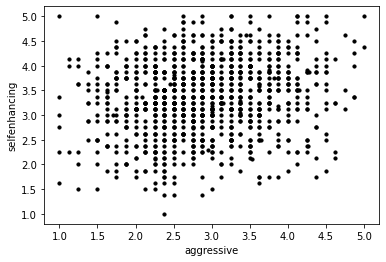

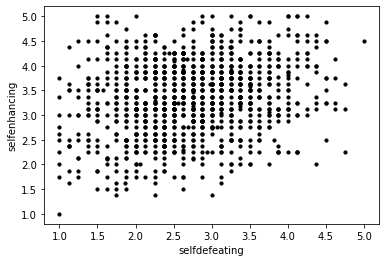

In [33]:
# df.plot(x="affiliative",y="selfenhancing",kind="scatter", s = 10, color='black')
df.plot(x="aggressive",y="selfenhancing",kind="scatter", s = 10, color='black')
df.plot(x="selfdefeating",y="selfenhancing",kind="scatter", s = 10, color='black')
# df.plot(x="age_group",y="selfenhancing",kind="scatter", s = 10, color='black')
plt.show()

In [34]:
#list all the type of gender
g = df.isMale.unique()
g

array([0, 1], dtype=uint8)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9e9c22e070>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9e9c222940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9e9c22ed00>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9e9c222460>,
 'fliers': [],
 'means': []}

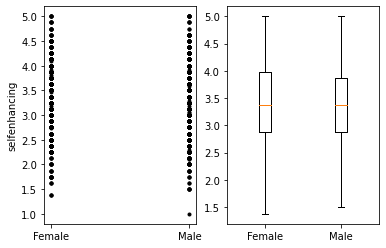

In [35]:
%matplotlib inline
ax = plt.subplot(1, 2, 1)
m = df.loc[df['isMale'] == 1, 'selfenhancing'].values.mean()
f = df.loc[df['isMale'] == 0, 'selfenhancing'].values.mean()

plt.xticks([0,1])
ax.set_xticklabels(['Female','Male'])
plt.ylabel('selfenhancing')
plt.plot(df['isMale'], df['selfenhancing'],'.k')
# plt.axhline(y=m,color="blue", linestyle='-', label="male mean", xmin=-1, xmax=0.2)
# plt.axhline(y=f,color="red",linestyle='-', label="female mean", xmin=0.9, xmax=1.2 )
# plt.legend()

plt.subplot(1, 2, 2)
df.sort_values(by = 'isMale', inplace = True)
selfenhancing_num = []
g = df.isMale.unique()
for i in g:
    selfenhancing_num.append(df.loc[df.isMale == i,'selfenhancing'])
    
plt.boxplot(x = selfenhancing_num,
            labels = ['Female','Male'], 
            showmeans=False, 
            showfliers=False,
            meanprops = {'linestyle':'--','color':'black'}
           )

In [36]:
m

3.3617969440362034

In [37]:
f

3.358608189620485

In [38]:
#training data:
X = df.iloc[:,df.columns != "selfenhancing"]
#label data:
y = df.iloc[:,df.columns == "selfenhancing"]

In [39]:
#spliting the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3
                                                ,random_state = 20
                                               )
# for i in [X_train, X_test, y_train, y_test]:
#     i.index = range(i.shape[0])
#reindex because I have OCD

In [42]:
#create a pipeline to compare each model and find out the best hyperparameter for each model using GridSearchCV
#might take a while, can have some bubble tea in the mean time while you are waiting :))

reg_pipe = Pipeline([('ss', StandardScaler()), #rescaling the features, centralizes data with unit variance
                     ('pf', PolynomialFeatures()), #checking whether polynomial function better suits the model
                       ('reg', Lasso())
                      ])

params = [{'reg__alpha': [0.1,1,10,100,200,300,400, 500]
           ,'reg': [Lasso(), Ridge()]
           ,'pf__degree': [1,2,3,4,5]
         }, {
    'reg': [LinearRegression()]#LinearRegression doesn't have alpha
    ,'pf__degree': [1,2,3,4,5]
}]

#using K-fold Cross Validation to reduce the change of overfitting
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=20)

gs_reg = GridSearchCV(reg_pipe,
                      param_grid=params,
                      scoring = "neg_mean_squared_error",
                      cv=cv)
gs_reg.fit(X_train, y_train)
gs_reg.best_params_


{'pf__degree': 1, 'reg': Ridge(alpha=100), 'reg__alpha': 100}

In [43]:
df3 = pd.DataFrame(gs_reg.cv_results_)
df3.sort_values('rank_test_score')[[
    'param_pf__degree',
    'param_reg',
    'param_reg__alpha',
    'mean_test_score',
    'rank_test_score'
]]

,param_pf__degree,param_reg,param_reg__alpha,mean_test_score,rank_test_score
11,1,Ridge(alpha=100),100,-0.539287,1
12,1,Ridge(alpha=100),200,-0.539675,2
10,1,Ridge(alpha=100),10,-0.539727,3
9,1,Ridge(alpha=100),1,-0.539841,4
8,1,Ridge(alpha=100),0.1,-0.539853,5
...,...,...,...,...,...
75,5,Ridge(alpha=100),100,-0.639213,81
74,5,Ridge(alpha=100),10,-0.696271,82
73,5,Ridge(alpha=100),1,-0.711998,83
72,5,Ridge(alpha=100),0.1,-0.713948,84


In [44]:
#get error on x_test
score = gs_reg.best_estimator_.score(X_test, y_test)

score

0.0898608712678921

In [45]:
gs_reg.best_estimator_

Pipeline(steps=[('ss', StandardScaler()), ('pf', PolynomialFeatures(degree=1)),
                ('reg', Ridge(alpha=100))])

In [46]:
#prediced values base on the regression model by X_test
predict = gs_reg.best_estimator_.predict(X_test) 
predic

array([[3.2441773 ],
       [3.52441094],
       [3.23530659],
       [3.37684987],
       [3.51636711],
       [3.26001625],
       [3.17791247],
       [3.3147628 ],
       [3.13324881],
       [3.21923167],
       [3.51636711],
       [3.40121759],
       [3.50860893],
       [3.25908973],
       [3.07850226],
       [3.31508539],
       [3.28001994],
       [3.41071616],
       [3.32884835],
       [3.1832397 ],
       [3.31300939],
       [3.23603383],
       [3.46288242],
       [3.21723494],
       [3.21641543],
       [3.13532481],
       [3.34284726],
       [3.1574672 ],
       [3.39288784],
       [3.44365593],
       [3.39487721],
       [3.37883924],
       [3.34977856],
       [3.56625836],
       [3.5105983 ],
       [3.39177531],
       [3.30002364],
       [3.4806111 ],
       [3.17568714],
       [3.38706935],
       [3.34077126],
       [3.2937829 ],
       [3.3860065 ],
       [3.34013066],
       [3.32289326],
       [3.48647956],
       [3.3398947 ],
       [3.205

In [47]:
cross_val_score(gs_reg.best_estimator_,X,y,cv=cv,scoring="neg_mean_squared_error").mean()

-0.5310846474971466

In [48]:
mean_squared_error(y_test,predict)

0.5184777409267335

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test,predict)

0.0898608712678921

In [50]:
r2 = gs_reg.best_estimator_.score(X_test,y_test)
r2

0.0898608712678921

In [51]:
y_test.values

array([[3.125     ],
       [4.5       ],
       [3.5       ],
       [3.125     ],
       [4.        ],
       [3.        ],
       [1.5       ],
       [4.        ],
       [4.5       ],
       [4.125     ],
       [3.625     ],
       [3.375     ],
       [2.5       ],
       [3.25      ],
       [3.375     ],
       [3.875     ],
       [2.25      ],
       [3.875     ],
       [3.875     ],
       [3.125     ],
       [3.375     ],
       [2.375     ],
       [3.25      ],
       [2.12129895],
       [2.5       ],
       [3.375     ],
       [3.25      ],
       [3.5       ],
       [1.75      ],
       [3.125     ],
       [3.375     ],
       [4.125     ],
       [3.25      ],
       [4.625     ],
       [3.        ],
       [4.25      ],
       [4.375     ],
       [4.375     ],
       [2.25      ],
       [3.75      ],
       [3.875     ],
       [4.        ],
       [3.625     ],
       [4.25      ],
       [4.        ],
       [2.875     ],
       [3.25      ],
       [3.75 

In [68]:
result = pd.DataFrame(np.c_[y_test.values,predict],columns = ["actual","predict"])
result

,actual,predict
0,3.125,3.244177
1,4.500,3.524411
2,3.500,3.235307
3,3.125,3.376850
4,4.000,3.516367
...,...,...
311,4.250,3.416870
312,4.000,3.362124
313,3.125,3.194422
314,3.375,3.276968


In [69]:
result = result.sort_values('actual')
result

,actual,predict
165,1.375,3.431696
142,1.375,3.228289
137,1.500,3.098270
6,1.500,3.177912
176,1.625,2.943604
...,...,...
246,4.875,3.657332
72,5.000,3.646236
223,5.000,3.582247
130,5.000,3.568484


<function matplotlib.pyplot.show(*args, **kw)>

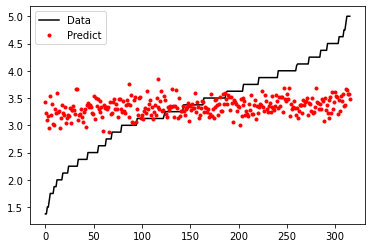

In [74]:
#as you can see, the data set is so bad that we can't predict anything :(
plt.plot(range(len(predict)), result['actual'], c='black', label="Data")
plt.plot(range(len(predict)), result['predict'], '.r', label="Predict")
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

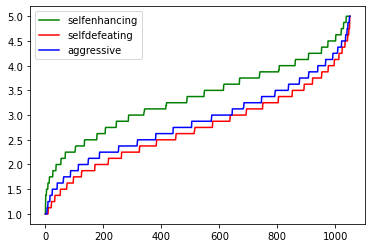

In [53]:
sorted(df.selfenhancing.values)
sorted(df.selfdefeating.values)
sorted(df.aggressive.values)

plt.plot(range(len(df.selfenhancing.values)), sorted(df.selfenhancing.values), c='green', label="selfenhancing")
plt.plot(range(len(df.selfdefeating.values)),sorted(df.selfdefeating.values), c="red", label="selfdefeating")
plt.plot(range(len(df.aggressive.values)), sorted(df.aggressive.values), c='blue', label="aggressive")
plt.legend()
plt.show

In [54]:
# import seaborn as sns

# cols = df[df["affiliative","selfdefeating","aggressive",'selfenhancing']]
# sns.pairplot(cols,hue=cols,size=2,diag_kind="hist",markers=["o","s","D"])
# plt.show()